<strong><b><font size="5">Diferenciação</font></b></strong>

Os conjuntos de dados de séries temporais podem conter tendência e sazonalidade, que podem precisar ser removidas antes da modelagem.

As tendências podem resultar em uma média variável ao longo do tempo, enquanto a sazonalidade pode resultar em uma variância variável ao longo do tempo, ambas as quais definem uma série temporal como não estacionária. Conjuntos de dados estacionários são aqueles que têm uma média e variância estáveis e, por sua vez, são muito mais fáceis de modelar.

A Diferenciação é uma transformação de dados popular e amplamente usada para tornar estacionários os dados de séries temporais.

**Séries Temporais Estacionárias**

As observações em uma série temporal estacionária não dependem do tempo.

As séries temporais são estacionárias se não tiverem efeitos de tendência ou sazonais. As estatísticas resumidas calculadas nas séries temporais são consistentes ao longo do tempo, como a média ou a variância das observações.

Quando uma série temporal é estacionária, pode ser mais fácil modelar. Os métodos de modelagem estatística assumem ou exigem que as séries temporais sejam estacionárias.

**Séries Temporais Não Estacionárias**

Observações de séries temporais não estacionárias mostram efeitos sazonais, tendências e outras estruturas que dependem do índice temporal.

Estatísticas resumidas, como média e variância, mudam com o tempo, fornecendo desvios nos conceitos que um modelo pode tentar capturar.

Os métodos clássicos de análise e previsão de séries temporais preocupam-se em tornar estacionários os dados de séries temporais não estacionárias, identificando e removendo tendências e removendo efeitos estacionários.

**Tornando os Dados da Série Estacionários**

Você pode verificar se sua série temporal está estacionária, observando um gráfico de linha da série ao longo do tempo (conforme já fizemos muitas vezes).

Sinal de tendências óbvias, sazonalidade ou outras estruturas sistemáticas da série são indicadores de uma série não estacionária.

Um método mais preciso seria usar um teste estatístico, como o teste de Dickey-Fuller, o qual também já estudamos.

Você deve deixar sua série temporal estacionária?

Geralmente sim.

Se você possui uma tendência e uma sazonalidade claras em suas séries temporais, modele esses componentes, remova-os das observações e treine seu modelo.

Se ajustamos um modelo estacionário aos dados, assumimos que nossos dados são a realização de um processo estacionário. Portanto, nosso primeiro passo na análise deve ser verificar se há alguma evidência de uma tendência ou efeitos sazonais e, se houver, removê-los.

É exatamente o que faremos agora!

### Carregando e Preparando os Dados

Vamos carregar os dados e prepará-los para mais uma rodada de análise.

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [1]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [2]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

Vamos carregar um dataset com uma série temporal.

O dataset é público e pode ser encontrado aqui:

https://www.kaggle.com/rakannimer/air-passengers

O conjunto de dados AirPassenger fornece totais mensais de passageiros de uma companhia aérea dos EUA, de 1949 a 1960. Esse conjunto de dados já é de uma classe de série temporal, portanto, nenhuma manipulação adicional de classe ou data é necessária.

In [3]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados_serie = pd.read_csv('https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv', 
                          header = None)

In [4]:
# Série
dados_serie.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# Ajusta o nome das colunas
dados_serie.columns = ['data','passageiros']

In [6]:
# Série
dados_serie.head()

,data,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
# Converte a data no formato apropriado
dados_serie['data'] = pd.to_datetime(dados_serie['data'], format = '%Y-%m')

In [8]:
# Série
dados_serie.head()

,data,passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
# Define a data como índice da série
dados_serie = dados_serie.set_index('data')

In [10]:
# Série
dados_serie.head()

,passageiros
data,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


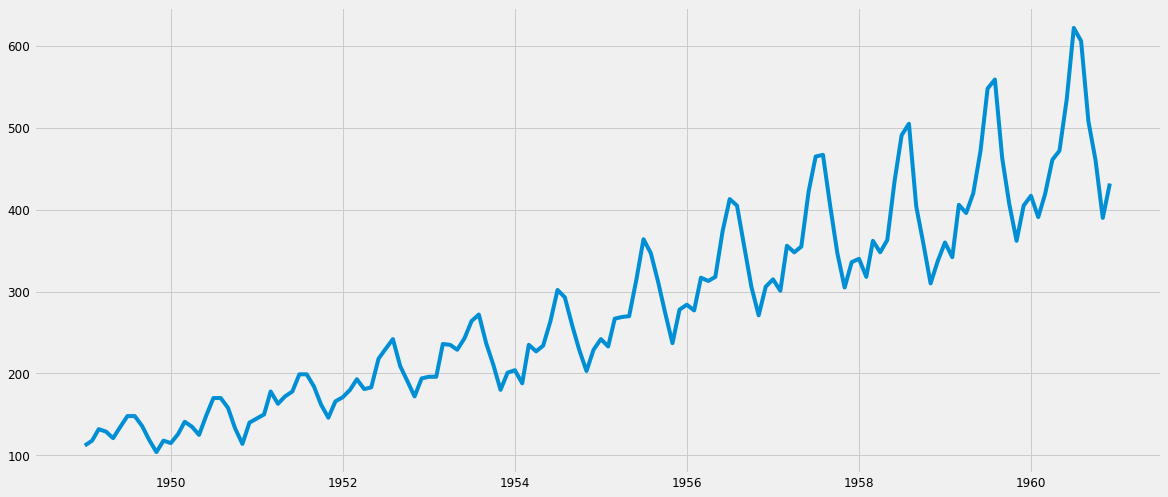

In [11]:
# Plot
plt.plot(dados_serie)

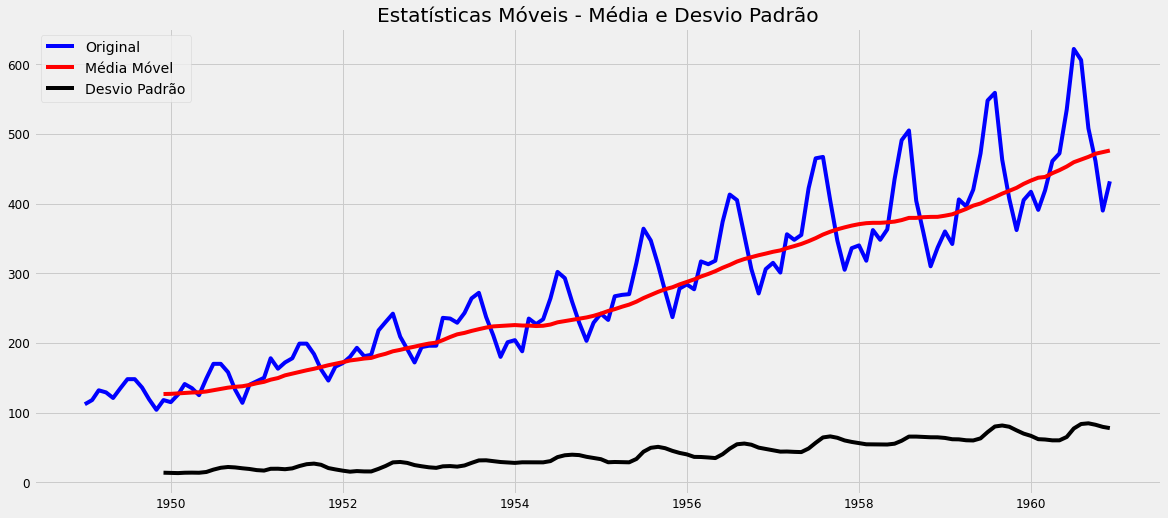


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.815369
Valor-p                           0.991880
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [12]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
testa_estacionaridade(dados_serie)

A série claramente não é estacionária. Média e variância (nesse caso desvio padrão, que é raiz quadrada da variância) variam ao longo do tempo. Vamos aplicar a transformação de log na série:

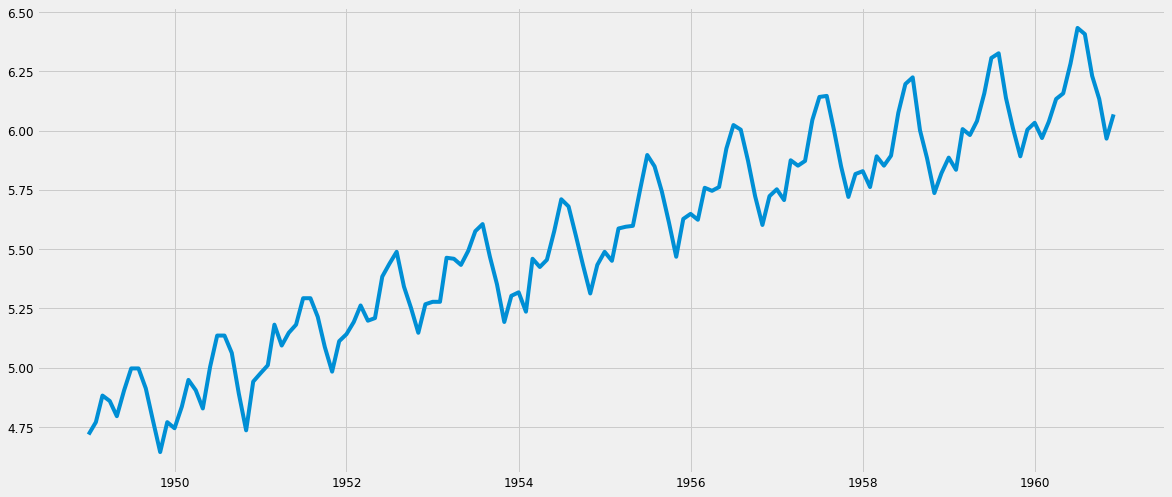

In [13]:
# Transformação de log
dados_serie_log = np.log(dados_serie)
plt.plot(dados_serie_log)

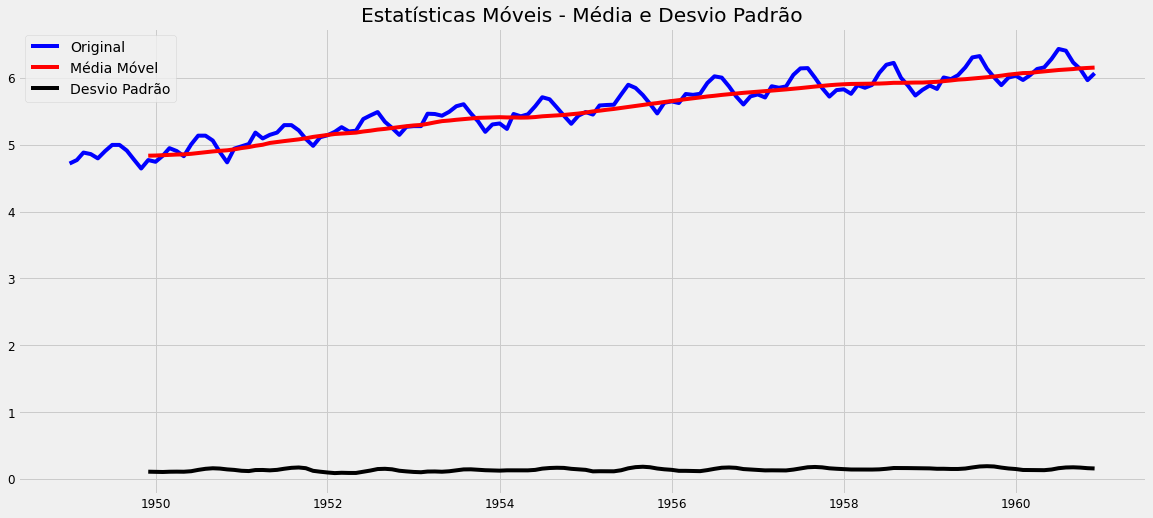


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.717017
Valor-p                           0.422367
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [14]:
# Vamos testar a estacionaridade da série após a transformação de log
testa_estacionaridade(dados_serie_log)

A transformação de log não foi suficiente para converter a série em estacionária. Não vamos desistir, seguimos em frente.

### Diferenciação

Nesta técnica, tomamos a diferença da observação em um determinado instante com a do instante anterior. A diferenciação é realizada subtraindo a observação anterior da observação atual:

difference(t) = observation(t) - observation(t-1)

A inversão do processo é necessária quando uma previsão deve ser convertida novamente na escala original. Este processo pode ser revertido adicionando a observação no passo anterior ao valor da diferença.

inverted(t) = differenced(t) + observation(t-1)

**Ordem da Diferença**

Alguma estrutura temporal ainda pode existir após a execução de uma operação de diferenciação, como no caso de uma tendência não linear.

Como tal, o processo de diferenciação pode ser repetido mais de uma vez até que toda a dependência temporal seja removida.

O número de vezes que a diferenciação é realizada é chamado de ordem da diferença. Na primeira diferenciação temos a Diferenciação de Primeira Ordem e assim por diante.

### Diferenciação Para Remover Tendência

Uma tendência torna uma série temporal não estacionária. Isso tem o efeito de variar o valor médio da série temporal ao longo do tempo. Veja 2 exemplos de como aplicar a diferenciação para remover tendência.

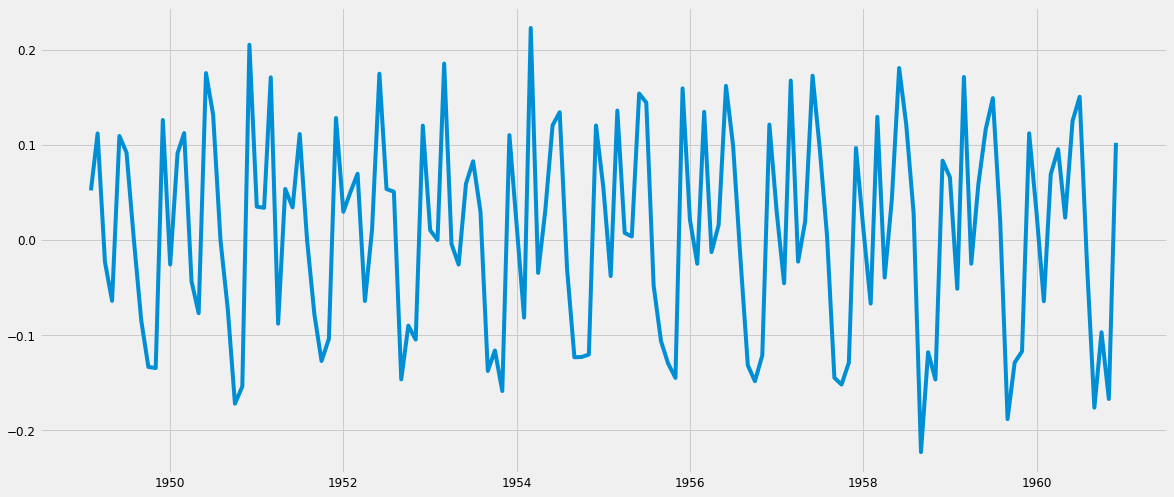

In [16]:
# Diferenciação Para Remover Tendência - Exemplo 1
# O método shift() move os dados e uma unidade
# Observe que estamos usando a série com transformação de log
dados_serie_diff1 = dados_serie_log.passageiros - dados_serie_log.passageiros.shift()
plt.plot(dados_serie_diff1)

In [17]:
# Você pode criar sua função para diferenciação, se desejar:
def diffFunc(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

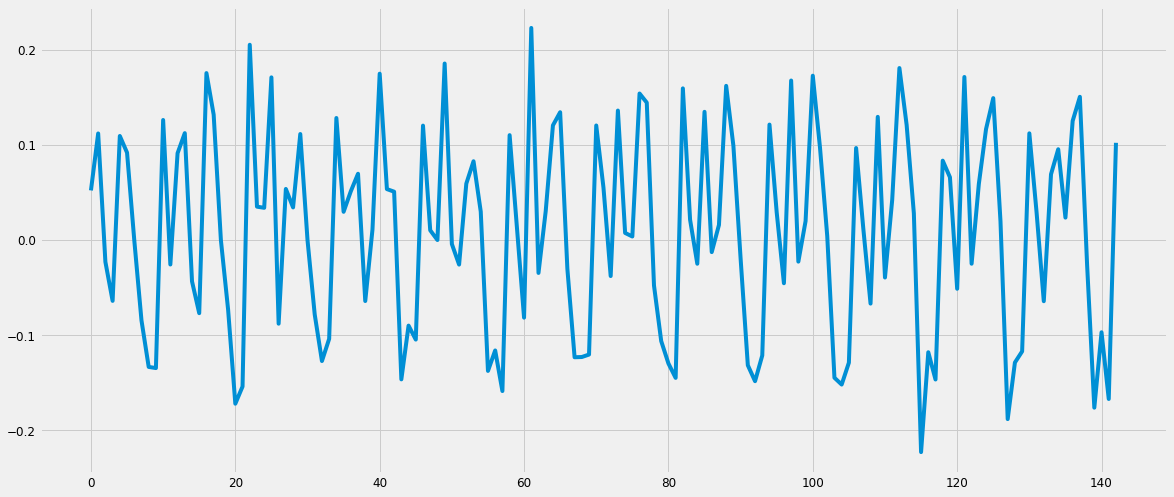

In [18]:
# Diferenciação Para Remover Tendência - Exemplo 2
# Observe que estamos usando a série com transformação de log
dados_serie_diff2 = diffFunc(dados_serie_log['passageiros'])
plt.plot(dados_serie_diff2)

In [19]:
# Converte em dataframe, a lista gerada ao aplicar a diferenciação
dados_serie_diff2_df = pd.DataFrame(dados_serie_diff2) 

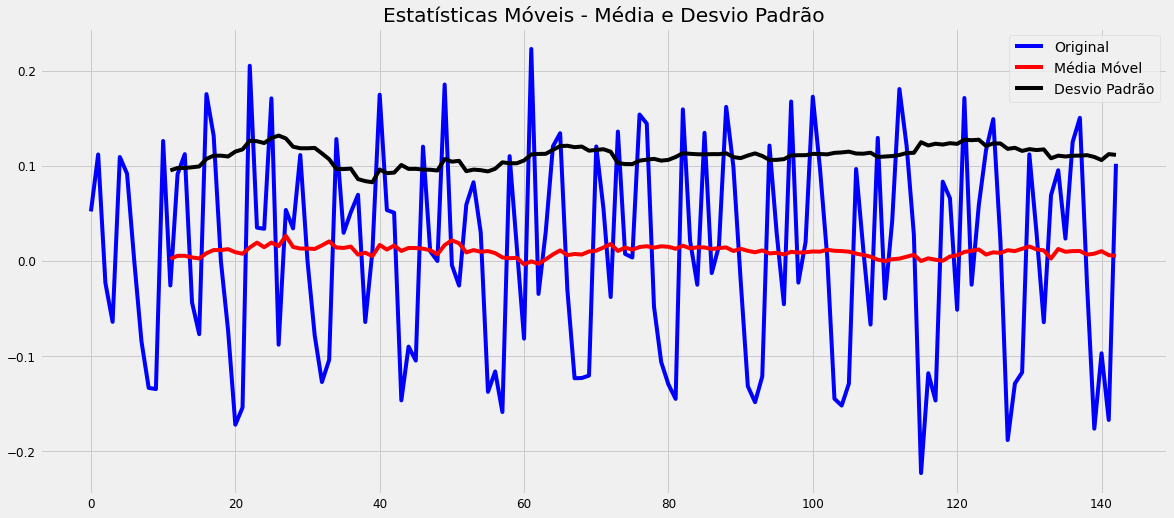


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -2.717131
Valor-p                           0.071121
Número de Lags Consideradas      14.000000
Número de Observações Usadas    128.000000
Valor Crítico (1%)               -3.482501
Valor Crítico (5%)               -2.884398
Valor Crítico (10%)              -2.578960
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [20]:
# Vamos testar a estacionaridade da série após a diferenciação para remover a tendência
# Como os 2 exemplos anteriores geram o mesmo resultado, vamos usar o segundo
testa_estacionaridade(dados_serie_diff2_df)

O valor-p reduziu bastante e está quase próximo do limite, e média e variância estão quase constantes. Vamos tentar mais uma transformação.

### Diferenciação Para Remover Sazonalidade

Variação sazonal, ou sazonalidade, são ciclos que se repetem regularmente ao longo do tempo.

Um padrão de repetição dentro de cada ano é conhecido como variação sazonal, embora o termo seja aplicado de maneira mais geral a padrões repetidos em qualquer período fixo.

Existem muitos tipos de sazonalidade. Alguns exemplos óbvios incluem: diariamente, semanalmente, mensalmente, anualmente e assim por diante. Sendo assim, identificar se há um componente de sazonalidade na série temporal é subjetivo.

A abordagem mais simples para determinar se há um aspecto de sazonalidade é plotar e revisar seus dados, talvez em escalas diferentes e com a adição de linhas de tendência.

O exemplo abaixo aplica a função diffFunc() à última versão da nossa série até aqui, com transformacão de log e diferenciação para remoer tendência. 

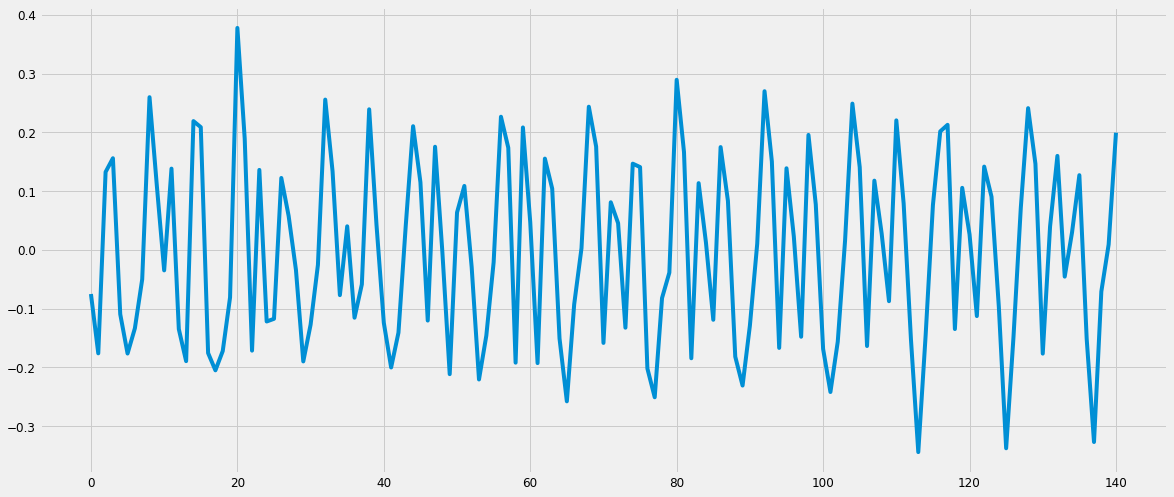

In [21]:
# Diferenciação para remover sazonalidade
# Observe o valor 2. Representa o intervalo para calcular a diferenciação. 
# Colocamos o valor 2 apenas para mostrar que é possível, mas se usarmos o valor 1 como usamos na 
# primeira diferenciação, o resultado é tão bom quanto.
dados_serie_diff3 = diffFunc(dados_serie_diff2, 2)
plt.plot(dados_serie_diff3)

In [22]:
# Converte aem dataframe, a lista gerada ao aplicar a diferenciação
dados_serie_final = pd.DataFrame(dados_serie_diff3) 

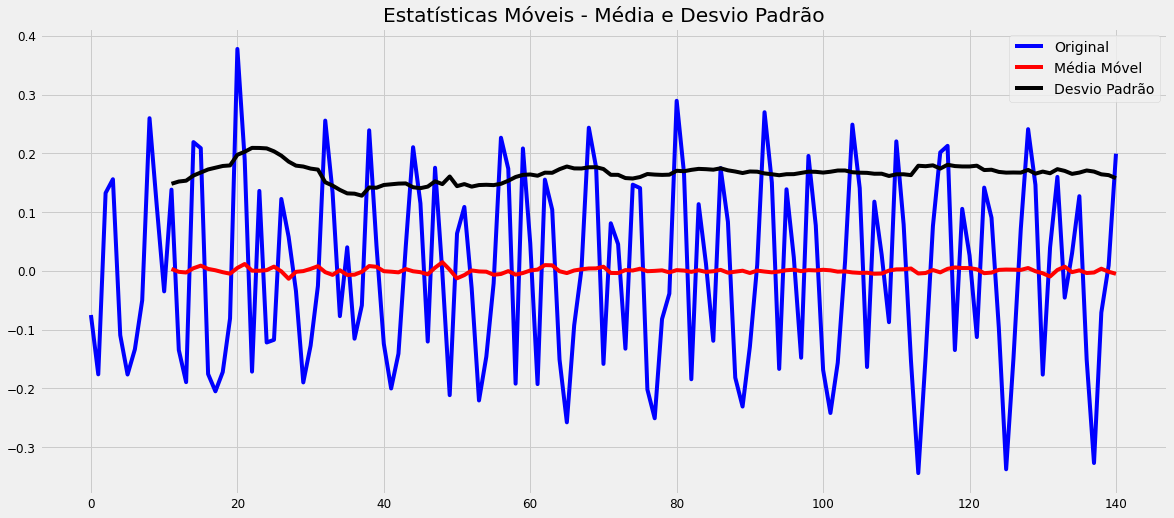


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.488221e+01
Valor-p                         1.603086e-27
Número de Lags Consideradas     1.000000e+01
Número de Observações Usadas    1.300000e+02
Valor Crítico (1%)             -3.481682e+00
Valor Crítico (5%)             -2.884042e+00
Valor Crítico (10%)            -2.578770e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [23]:
# Remove valores NA e testa a estacionaridade
dados_serie_final.dropna(inplace = True)
testa_estacionaridade(dados_serie_final)

Ufa! Deu trabalho. Mas aí está. Nossa série agora é estacionária e já podemos usá-la para construir modelos preditivos. Observe que as estatísticas agora são constantes e não variam mais com o tempo.